<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Dev/Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **前言**  

在資料科學領域中，觀察和理解數據的分布，是一開始解析數據的重要環節之一。一般而言，我們常常使用直方圖(Histogram)，來呈現一組數據分佈的情況，能迅速地了解資料的集中趨勢與離散性，然而，對於直方圖而言，分箱數量或寬度的選擇，易對直方圖的呈現有顯著不同的影響。  

當我們希望獲得資料更細緻的分佈特徵，與其所對應的機率密度函數時，[核密度估計(Kernel Density Estimation, KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation)便是一個極具價值且實用的方法，KDE 不僅能平滑數據捕捉樣本的潛在型態，且還能估算出樣本的機率密度函數，提供更多元且詳盡的數據細節。  

# <font color="#00dd00">**核密度估計 Kernel Gensity Estimation**</font>

核密度估計 KDE 是一種[無母數統計](https://en.wikipedia.org/wiki/Nonparametric_statistics)的方法，主要用於估計一隨機變數的[機率密度函數(Probability Density Function)](https://en.wikipedia.org/wiki/Probability_density_function)。KDE 的基本概念是在每個樣本觀測值上，藉由核函數(Kernel Function)估計其周遭的機率分布，且加權平均所有的核函數，作為估計整體樣本資料的機率分布。核密度估計的數學公式為 :


$$\displaystyle \hat f_h(x)=\frac{1}{N} \sum_{i=1}^{N} K_h(x-x_i) = \frac{1}{N\times h} \sum_{i=1}^{N} K\Big(\frac{x-x_i}{h}\Big)$$

</br>
其中，$\displaystyle K_h(x) = \frac{1}{h} K\Big(\frac{x}{h}\Big)$ 稱為縮放核函數(Scaled Kernel Function)、$K(\cdot)$ 為核函數(Kernel Function)，且 $h$ 為帶寬(Bandwidth)。

</br>  
- 常見的核函數 :   
  (1) **Gaussian Kernel** : $\displaystyle K(x)= \exp{\Big(-\frac{x^2}{2}\Big)}$；     
  (2) **Tophat Kernel** : $K(x) = 1$ if $x<h$；  
  (3) **Linear Kernel** : $\displaystyle K(x) = 1 - \frac{x}{h}$ if $x<h$。    
  
  </br>
  下圖為各種不同的核函數示意圖 :     
<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Kernel_Density_Estimation/imgs/Available_Kernels.png">
</p>

  下圖為不同核函數在相同的帶寬選擇下，對於同一組資料的核密度估計的機率分布結果 :  
<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Kernel_Density_Estimation/imgs/KDE_with_different_Kernels.png">
</p>

</br>  
- **帶寬 Bandwidth** :  
帶寬的選擇，是核密度估計的一個重要環節，攸關核密度估計分布的平滑度，過小的帶寬易造成過度擬合，過大的帶寬則可能導致估計分布過度平滑，忽略真實分佈的細節。下圖為 Gaussian Kernel 搭配不同的帶寬，對於同一組資料的核密度估計的機率分布結果 :        
<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Kernel_Density_Estimation/imgs/Gaussian_Kernel_with_different_Bandwidths.png">
</p>

</br>   
- KDE 常見的應用:
  - 數據分布的探索
  - 離群值的偵測
  - 數據趨勢的檢測
  - 數據模擬 : 蒙地卡羅演算法(Monte-Carlo Method)
  - 分群問題的聚類演算法 : [均值偏移 MeanShift](https://scikit-learn.org/1.2/modules/clustering.html#mean-shift)
    

# Python 範例程式  

我們可使用 [```sklearn.neighbors.KernelDensity()```](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn-neighbors-kerneldensity) 函數，對樣本資料進行核密度估計的擬合。



## 載入套件

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns
import sklearn
from sklearn.neighbors import KernelDensity

print('Python version:', sys.version[0:7])
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('SciPy version:', scipy.__version__)
print('Matplotlib version:', mpl.__version__)
print('Seaborn version:', sns.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.10.12
NumPy version: 1.25.2
Pandas version: 1.5.3
SciPy version: 1.11.4
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
Scikit-Learn version: 1.2.2


## **核函數 Kernel**

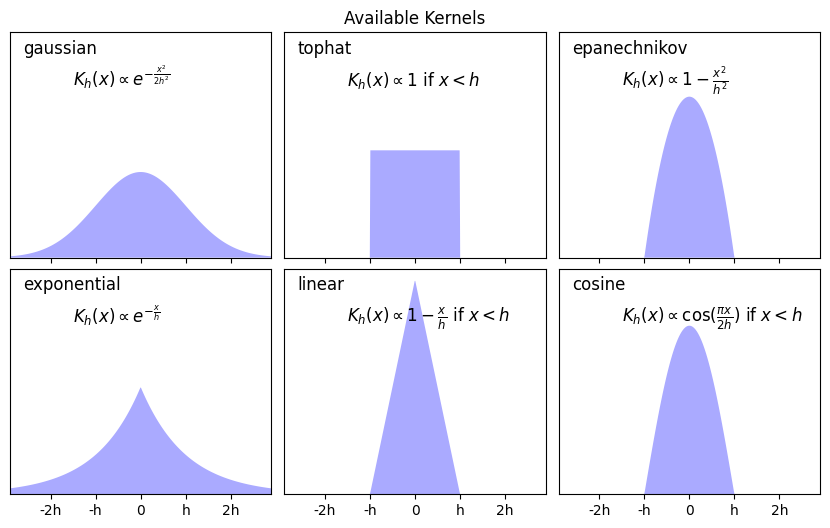

In [2]:
#@title 各種不同的核函數

#@markdown 在 ```sklearn.neighbors.KernelDensity(kernel)``` 函數中，
#@markdown ```kernel``` 參數為核函數的選擇設定，套件中提供 6 種不同的核函數。
#@markdown 下圖為 6 種核函數的示意圖與數學式 :

X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, figsize=(9, 6), sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

kernel_formula = ['$K_h(x) \\propto e^{-\\frac{x^2}{2h^2}}$',
                  '$K_h(x) \\propto 1 $'+' if '+'$x<h$',
                  '$K_h(x) \\propto 1-\\frac{x^2}{h^2}$',
                  '$K_h(x) \\propto e^{-\\frac{x}{h}}$',
                  '$K_h(x) \\propto 1-\\frac{x}{h}$'+' if '+'$x<h$',
                  '$K_h(x) \\propto \\cos(\\frac{\pi x}{2h})$'+' if '+'$x<h$']

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel, fontsize=12)
    axi.text(-1.5, 0.8, kernel_formula[i], fontsize=12)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

img_path = 'Available_Kernels.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

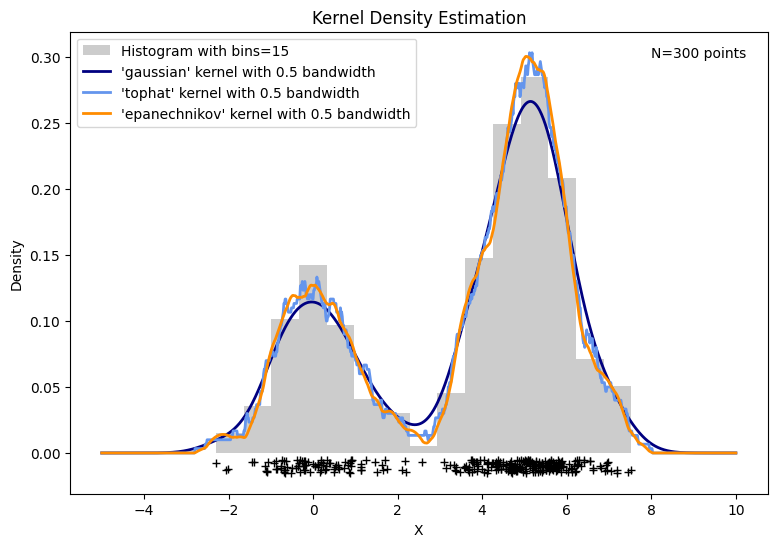

In [3]:
#@title 相同帶寬下，各種不同的核函數

#@markdown 在相同的帶寬條件下，不同核函數對於同一組資料的機率密度函數 :

N = 300
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_dens = 0.3*stats.norm(0, 1).pdf(X_plot[:, 0])+0.7*stats.norm(5, 1).pdf(X_plot[:, 0])
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(x=X.reshape(-1), density=True, bins=15, fc='black', alpha=0.2, label='Histogram with bins=15')

colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2
for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="'{0}' kernel with 0.5 bandwidth".format(kernel),
    )
ax.plot(X[:, 0], -0.005-0.01*np.random.random(X.shape[0]), "+k")

ax.legend(loc='upper left')
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.text(8, 0.3, 'N={0} points'.format(N))
ax.set_title('Kernel Density Estimation')

img_path = 'KDE_with_different_Kernels.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## **帶寬 Bandwidth**


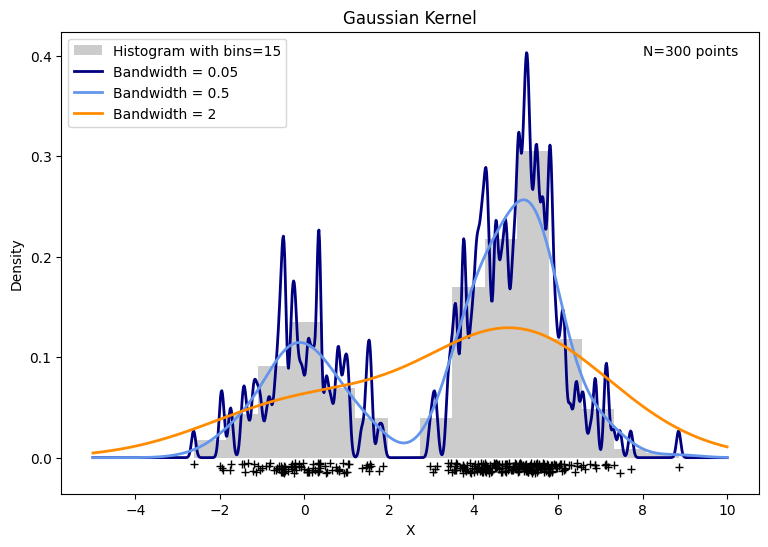

In [4]:
#@title 帶寬的影響

#@markdown 當我們設定過小的帶寬，易造成擬合的機率密度函數平滑不足，函數曲線會出現鋸齒狀，
#@markdown 另一方面，若設定過大的帶寬，易造成擬合的機率密度函數過度平滑，函數曲線易呈單峰分布。
#@markdown 下圖為 Gaussian 核函數，選擇不同帶寬的擬合結果 :


N = 300
np.random.seed(42)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3*N)), np.random.normal(5, 1, int(0.7*N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_dens = 0.3*stats.norm(0, 1).pdf(X_plot[:, 0])+0.7*stats.norm(5, 1).pdf(X_plot[:, 0])
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(x=X.reshape(-1), density=True, bins=15, fc='black', alpha=0.2, label='Histogram with bins=15')

colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'gaussian', 'gaussian']
bandwidths = [0.05, 0.5, 2]
lw = 2
for color, kernel, bandwidth in zip(colors, kernels, bandwidths):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label='Bandwidth = {0}'.format(bandwidth),
    )
ax.plot(X[:, 0], -0.005-0.01*np.random.random(X.shape[0]), "+k")

ax.legend(loc='upper left')
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.text(8, 0.4, 'N={0} points'.format(N))
ax.set_title('Gaussian Kernel')

img_path = 'Gaussian_Kernel_with_different_Bandwidths.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 帶寬的設定選擇

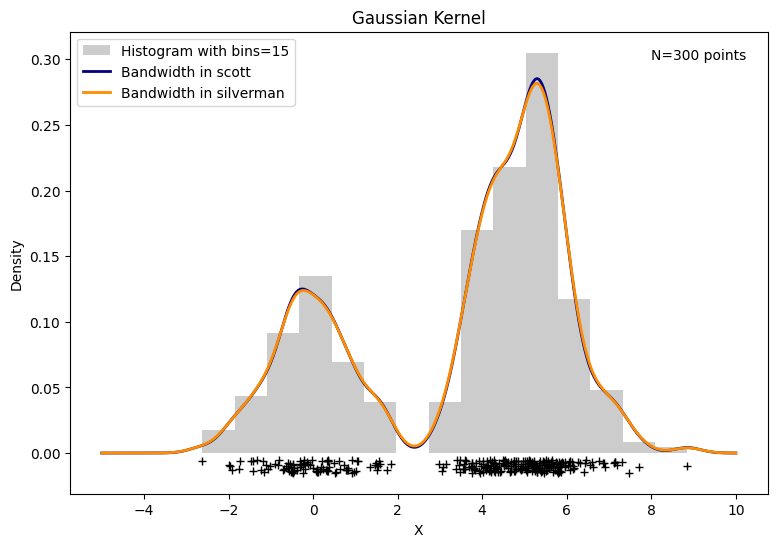

In [5]:
#@title 經驗法則

#@markdown 在 ```sklearn.neighbors.KernelDensity(kernel, bandwidth)``` 函數中，```bandwidth``` 參數係用來設定帶寬的大小，
#@markdown 套件中提供兩種選擇帶寬的經驗法則: 'scott' 與 'silverman'，其定義分別如下 :
#@markdown - **Scott’s Rule of Thumb**
#@markdown $$h \approx 1.06 \times\hat{\sigma} \times N^{-1/5},$$
#@markdown 其中，$\hat{\sigma}$ 為資料的標準差。

#@markdown - **Silverman’s Rule of Thumb**
#@markdown $$h \approx 0.9 \times\min{\{\hat{\sigma}, \frac{IQR}{1.35} \}} \times N^{-1/5},$$
#@markdown 其中，$\hat{\sigma}$ 為資料的標準差，$IQR$ 為[四分衛距(Interquartile Range)](https://en.wikipedia.org/wiki/Interquartile_range)。

#@markdown 下圖為 Gaussian 核函數，分別利用上述兩經驗法則的擬合結果 :

N = 300
np.random.seed(42)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3*N)), np.random.normal(5, 1, int(0.7*N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_dens = 0.3*stats.norm(0, 1).pdf(X_plot[:, 0])+0.7*stats.norm(5, 1).pdf(X_plot[:, 0])
fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(x=X.reshape(-1), density=True, bins=15, fc='black', alpha=0.2, label='Histogram with bins=15')

colors = ['navy', 'darkorange']
kernels = ['gaussian', 'gaussian']
bandwidths = ['scott', 'silverman']
lw = 2
for color, kernel, bandwidth in zip(colors, kernels, bandwidths):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label='Bandwidth in {0}'.format(bandwidth),
    )
ax.plot(X[:, 0], -0.005-0.01*np.random.random(X.shape[0]), "+k")

ax.legend(loc='upper left')
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.text(8, 0.3, 'N={0} points'.format(N))
ax.set_title('Gaussian Kernel')

img_path = 'Gaussian_Kernel_with_Scott’s_and_Silverman’s_Rule_of_Thumb.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 【實作】範例資料

### 讀取資料

In [6]:
sample_data = pd.read_excel('./sample_data_for_KDE.xlsx')

group_1_data = sample_data[sample_data['Group']=='Group 1']
group_2_data = sample_data[sample_data['Group']=='Group 2']

sample_data.head()

,Value,Group
0,0.0428,Group 2
1,0.0426,Group 2
2,0.0423,Group 2
3,0.0423,Group 2
4,0.0429,Group 1


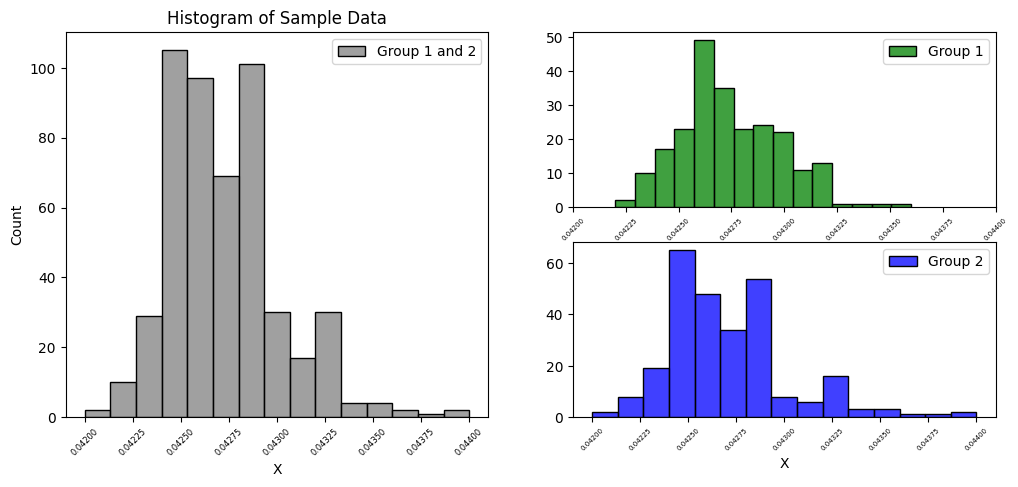

In [7]:
# 資料視覺化
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

sns.histplot(data=sample_data, x='Value', stat='count', bins=15, label='Group 1 and 2', color='gray', ax=ax1)
ax1.legend()
ax1.tick_params(axis='x', labelrotation=45, labelsize=6)
ax1.set_xlabel('X')
ax1.set_title('Histogram of Sample Data')

sns.histplot(data=group_1_data, x='Value', stat='count', bins=15, label='Group 1', color='green', ax=ax2)
ax2.legend()
ax2.set_xlim(sample_data['Value'].min(), sample_data['Value'].max())
ax2.tick_params(axis='x', labelrotation=45, labelsize=5)
ax2.set_xlabel('')
ax2.set_ylabel('')

sns.histplot(data=group_2_data, x='Value',  stat='count', bins=15, label='Group 2', color='blue', ax=ax3)
ax3.legend()
ax2.set_xlim(sample_data['Value'].min(), sample_data['Value'].max())
ax3.tick_params(axis='x', labelrotation=45, labelsize=5)
ax3.set_xlabel('X')
ax3.set_ylabel('')

img_path = 'Histogram_of_Sample_Data.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 定義函數

帶寬選擇的經驗法則 :

In [8]:
def bw_scott(data: np.ndarray):
    '''
    Scott’s Rule of Thumb
    '''

    std_dev = np.std(data, axis=0, ddof=1)
    n = len(data)

    return 1.06*std_dev*n**(-0.2)

In [9]:
def bw_silverman(data: np.ndarray):
    '''
    Silverman's Rule of Thumb
    '''

    def _select_sigma(x):
        normalizer = 1.349
        iqr = (stats.scoreatpercentile(x, 75)-stats.scoreatpercentile(x, 25))/normalizer
        std_dev = np.std(x, axis=0, ddof=1)
        return np.minimum(std_dev, iqr) if iqr > 0 else std_dev

    sigma = _select_sigma(data)
    n = len(data)
    return 0.9*sigma*n**(-0.2)

### 核密度估計

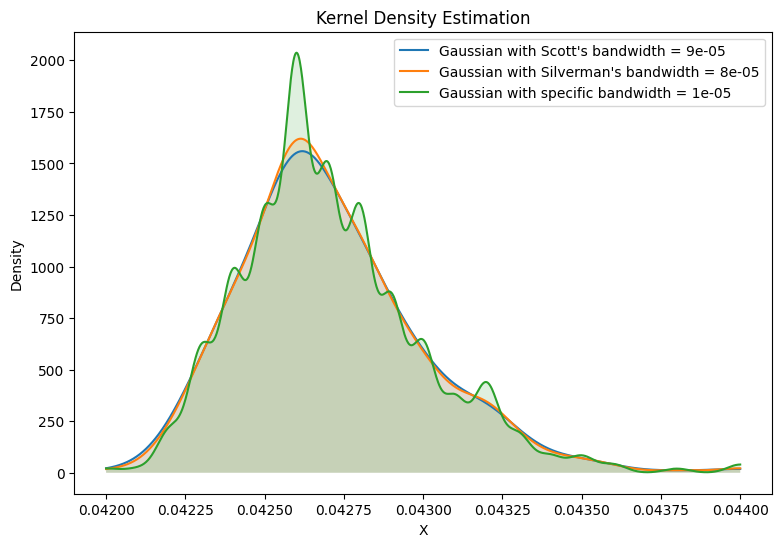

In [10]:
# 資料型態轉換成 2D array
x_data = sample_data['Value']
x_data = x_data.to_numpy().reshape(-1, 1)

# 估計頻寬
h_scott = bw_scott(x_data)[0]
h_silverman = bw_silverman(x_data)[0]
bw_algorithms = [('Scott', h_scott), ('Silverman', h_silverman)]

# 計算核密度估計函數
kde_with_h_scott = KernelDensity(kernel='gaussian', bandwidth=h_scott).fit(x_data)
kde_with_h_silverman = KernelDensity(kernel='gaussian', bandwidth=h_silverman).fit(x_data)
kde_with_specific_h = KernelDensity(kernel='gaussian', bandwidth=0.00003995).fit(x_data)
kde = [kde_with_h_scott, kde_with_h_silverman, kde_with_specific_h]
bw_algorithms = [('Scott', h_scott), ('Silverman', h_silverman), ('specific', 0.00000995)]

############### 繪製核密度估計函數 ###############
# X 座標軸範圍
x_range = np.linspace(min(x_data), max(x_data), num=1000).reshape(-1, 1)

# 計算每個樣本(X) 的 likelihood
density_vals = []
for k in kde:
    log_density = k.score_samples(x_range)
    density_value = np.exp(log_density)
    density_vals.append(density_value)

plt.subplots(figsize=(9, 6))
for idx, density_val in enumerate(density_vals):
    if idx<2:
        plt.plot(x_range.ravel().tolist(), density_val.tolist(),
                 label='Gaussian with '+bw_algorithms[idx][0]+ '\'s bandwidth = '+str(round(bw_algorithms[idx][1], 5)))

    else:
      plt.plot(x_range.ravel().tolist(), density_val.tolist(),
               label='Gaussian with '+bw_algorithms[idx][0]+ ' bandwidth = '+str(round(bw_algorithms[idx][1], 5)))

    plt.fill_between(x_range.ravel().tolist(), density_val.tolist(), alpha=.15)
plt.legend()
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')

img_path = 'KDE_of_Sample_Data.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()